In [ ]:
import tensorflow.keras as keras
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, ZeroPadding2D,DepthwiseConv2D, ReLU, Input,AveragePooling2D, GlobalAveragePooling2D,Dense
from keras.activations import sigmoid,relu
from keras.optimizers import SGD, Adam
from keras.models import Sequential,Model

Architecture referred via https://arxiv.org/pdf/1704.04861.pdf

In [ ]:
#Input feature map dimension: a*b*3
#kernel dimension (conventional convolutional neural networks) : 3*3*n where n = number of feature maps
#In mobilenet, these are replaced by depth wise seperable convolutions
#i.e 3*3** n becomes :: 2D convolution with 3*3 depth wise conv kernel followed by Batch Normalisation and Relu activation with 1*1 conv + Relu+ BatchNormalisation

def MobileNetv1(input_shape, number_classes):
  #depth wise convolution block definition
  def depthwise_convolutionBlock(InputTensor, pointwise_filter_size, stride):
    #Depthwise layer
    x = DepthwiseConv2D(3,stride,padding='same')(InputTensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    #Pointwise layer
    x = Conv2D(pointwise_filter_size,1)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
  
  Model_input = Input(input_shape)
  x = Conv2D(32,3,2,padding='same')(Model_input)
  #Batch normalisation and ReLU activation after each convolution are mandatory for non-linearity and avoiding co-variance shift
  x = BatchNormalization()(x)
  x = ReLU()(x)
  print(x)
  #now stacking depthwise conv block as per Mobilenet paper
  x = depthwise_convolutionBlock(x,64,1)
  print(x)
  x = depthwise_convolutionBlock(x,128,2)
  x = depthwise_convolutionBlock(x,128,1)
  x = depthwise_convolutionBlock(x,256,2)
  x = depthwise_convolutionBlock(x,256,1)
  x = depthwise_convolutionBlock(x,512,2)
  for i in range(5):
    x = depthwise_convolutionBlock(x,512,1)
  x = depthwise_convolutionBlock(x,1024,1)
  x = depthwise_convolutionBlock(x,1024,1)
  #Adding average pooling 2D layer
  x = GlobalAveragePooling2D()(x) 
  #x = GlobalAveragePooling2D()
  # full connected i.e dense layer
  logits = Dense(number_classes, activation='softmax')(x)
  model = Model(Model_input, logits)
  return model


In [ ]:
Input_shape = 224,224,3
num_classes = 1000
model = MobileNetv1(Input_shape,num_classes)
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 112, 112, 32), dtype=tf.float32, name=None), name='re_lu_160/Relu:0', description="created by layer 're_lu_160'")
KerasTensor(type_spec=TensorSpec(shape=(None, 112, 112, 64), dtype=tf.float32, name=None), name='re_lu_162/Relu:0', description="created by layer 're_lu_162'")
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 112, 112, 32)      896       
_________________________________________________________________
batch_normalization_160 (Bat (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu_160 (ReLU)             (None, 112, 112, 32)      0         
_________________________________________________________________
dep

We can see that total number of parameters here too is 4.2 Million which is same as that being quoted in paper.


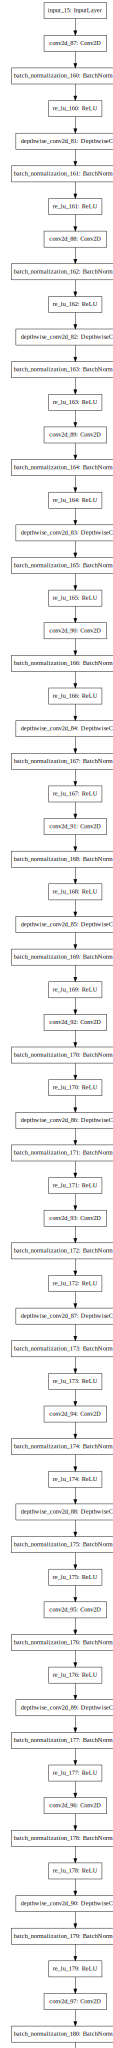

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))
